# Images with OpenCV

Processing images, be that cropping, rotating, segmentation, classification or restoration and generation can be performed with OpenCV.

Additionally, working with cloud data requires the storage and transmission of images, specifically on the Interwebs.

It is incredibly useful to be able to work with images on a programmatic level as opposed to a GUI, as this leads to automation.

In [1]:
# first lets define the helper task, to concat images together
# for side to side comparison

In [2]:
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [5]:
# import OpenCV and os
import cv2
import os

In [9]:
# get current working directory
cwd = os.getcwd()
# img filename
img_file = "mountain.jpeg"
# create path
img_path = os.path.join(cwd,img_file)

# get image with imread method
img = cv2.imread(img_path)

In [11]:
# imread method converts the image to a numpy array
img

array([[[220, 136,  71],
        [219, 137,  72],
        [220, 137,  75],
        ...,
        [236, 155,  87],
        [237, 156,  88],
        [238, 157,  90]],

       [[220, 139,  72],
        [220, 138,  73],
        [219, 139,  74],
        ...,
        [236, 155,  87],
        [236, 155,  88],
        [236, 155,  88]],

       [[218, 139,  72],
        [219, 140,  73],
        [217, 139,  72],
        ...,
        [236, 158,  89],
        [235, 157,  88],
        [234, 156,  87]],

       ...,

       [[117,  78,  34],
        [115,  81,  35],
        [116,  80,  34],
        ...,
        [143,  99,  45],
        [143,  96,  44],
        [140,  93,  42]],

       [[119,  77,  34],
        [116,  80,  34],
        [117,  78,  33],
        ...,
        [143,  98,  47],
        [145,  98,  47],
        [143,  95,  47]],

       [[121,  76,  33],
        [120,  79,  34],
        [120,  78,  33],
        ...,
        [143,  97,  49],
        [147,  98,  52],
        [145,  96,  52]]

In [12]:
# the usual methods and attributes for numpy arrs apply
img.shape

(667, 1000, 3)

nb. the image shape is the same as when dealt with with pillow BUT!

OpenCV has the color channels in a different order (B,G,R)

### Plotting Images

In [16]:
# imshow method will show images BUT apprently not in jupyter notebooks
cv2.imshow(img_file, img)

In [17]:
# so instead, use matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

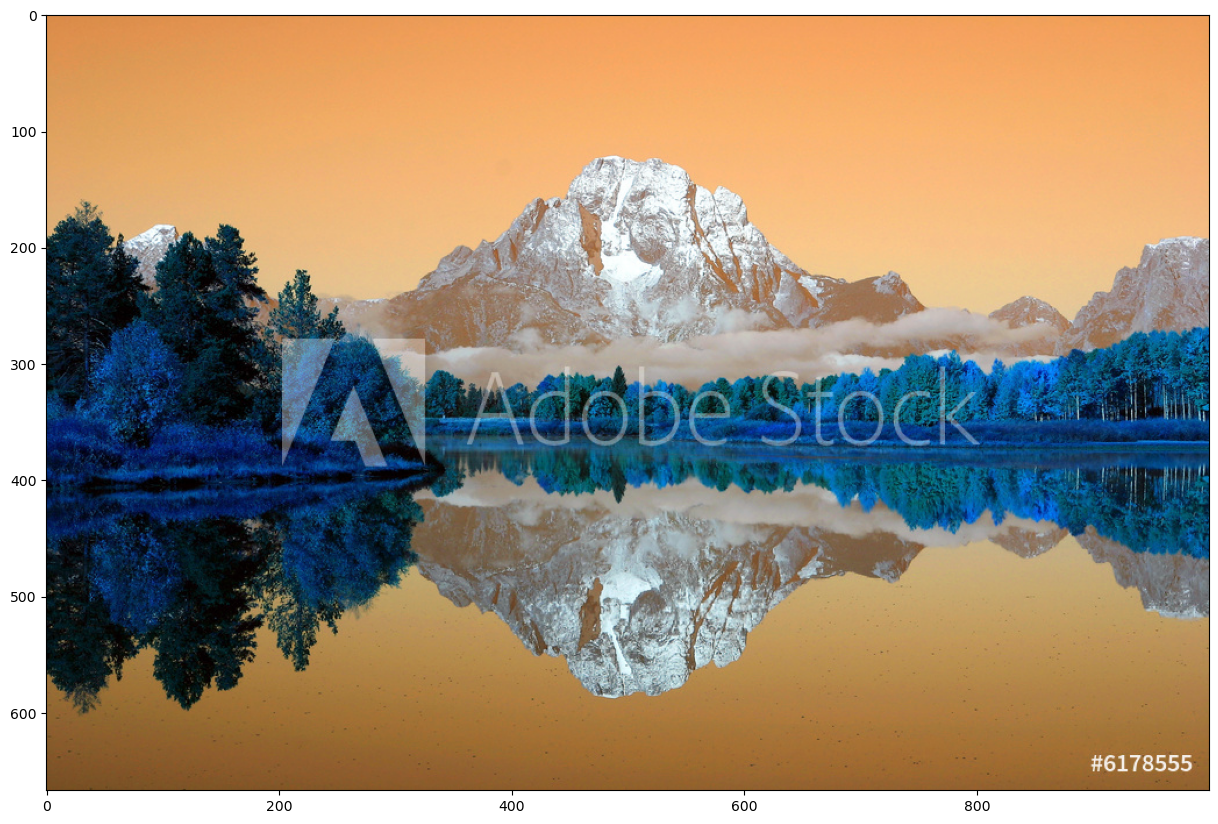

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

As you can see the image is FUBAR. This is because the channels are being interpreted as RGB so the order needs to be changed. This can be done using the cvtColor() method

In [19]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

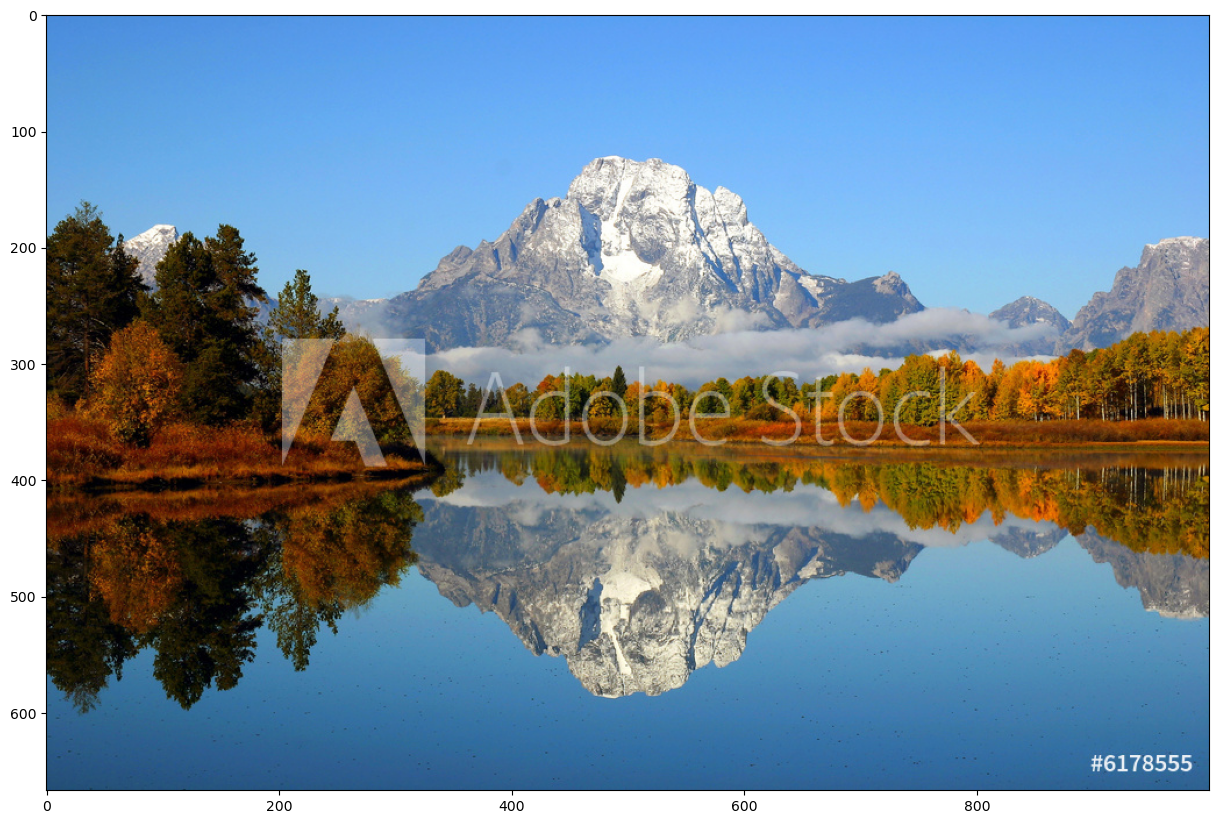

In [20]:
# plot again
plt.figure(figsize=(15,15))
plt.imshow(rgb_img)
plt.show()

In [23]:
# again the image can be loaded using path using imread()
img_from_path = cv2.imread(img_path)
img_from_path.shape

(667, 1000, 3)

In [25]:
# files can be saved using imwrite()
cv2.imwrite("cv2_mountain.jpg", img)

True

### Greyscale

greyscale can be accomplished using the cvtColor function and then applying the appropriate color attribute, in this case COLOR_BGR2GRAY

In [36]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

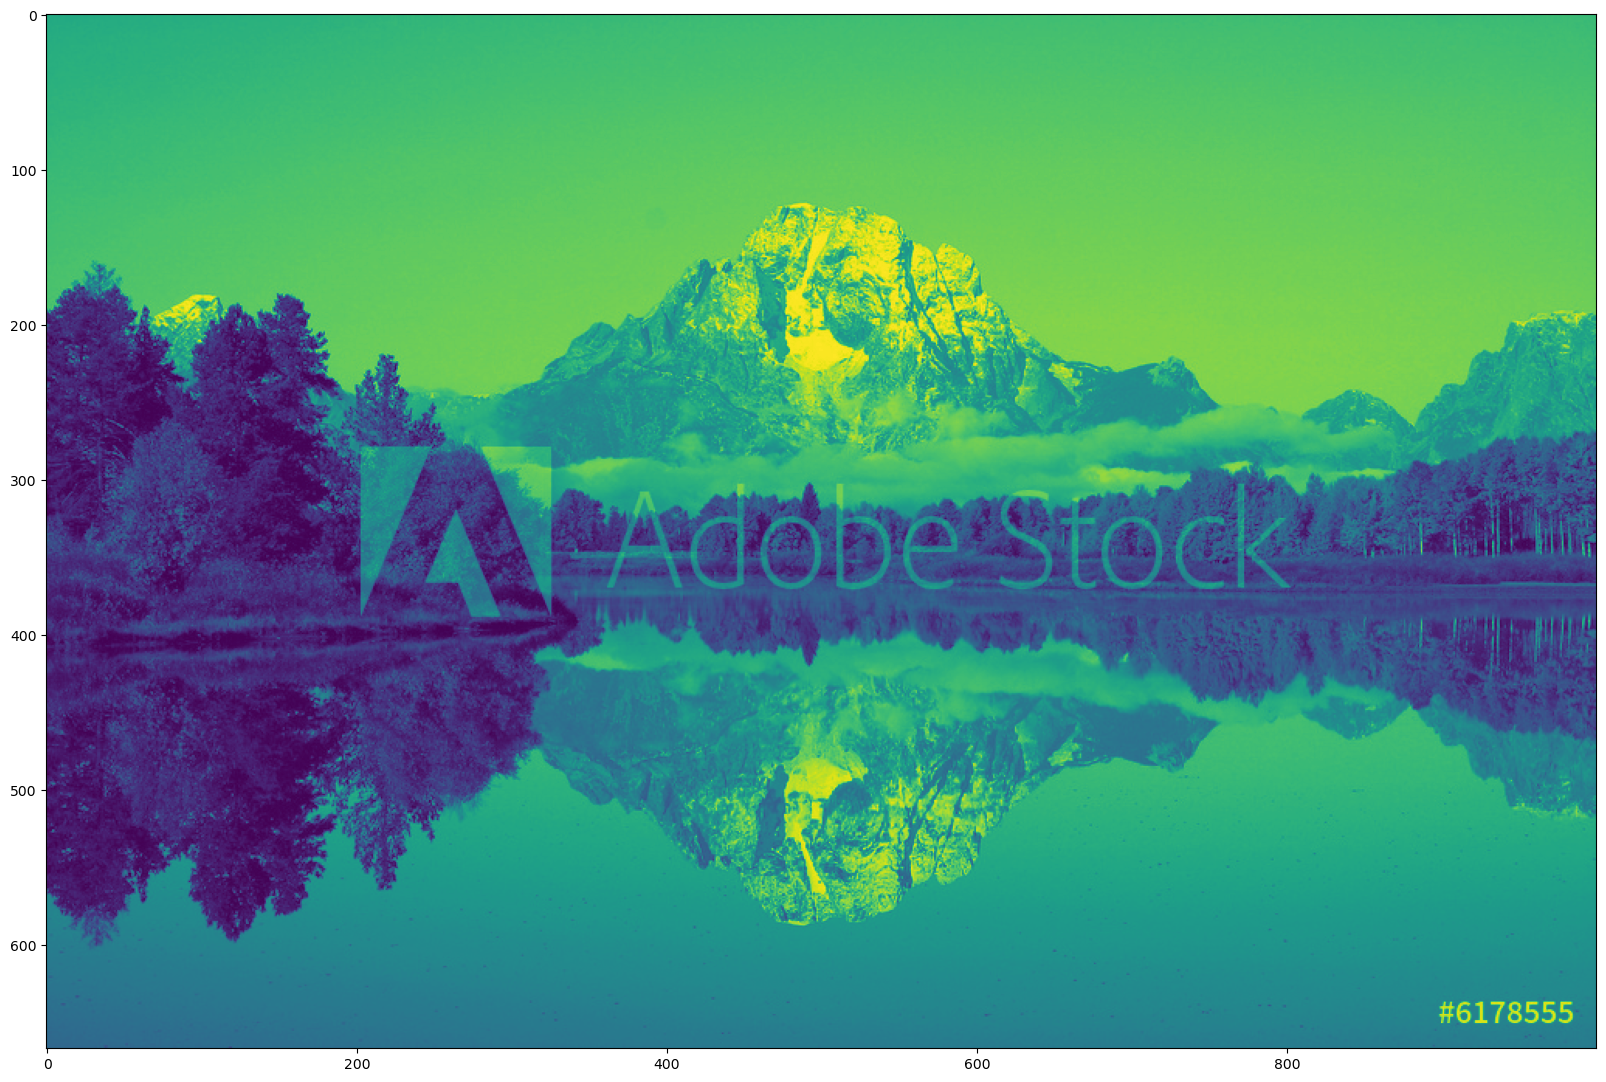

In [38]:
plt.figure(figsize=(20,20))
plt.imshow(img_gray)
plt.show()

In [39]:
img_gray.shape

(667, 1000)

clearly something went wrong here but its 1 dimensional soooooo meh

A grayscale image can also be loaded in but the flage must be set to show that the img is grayscale

In [40]:
im_gray = cv2.imread("grey_mountain.jpeg", cv2.IMREAD_GRAYSCALE)

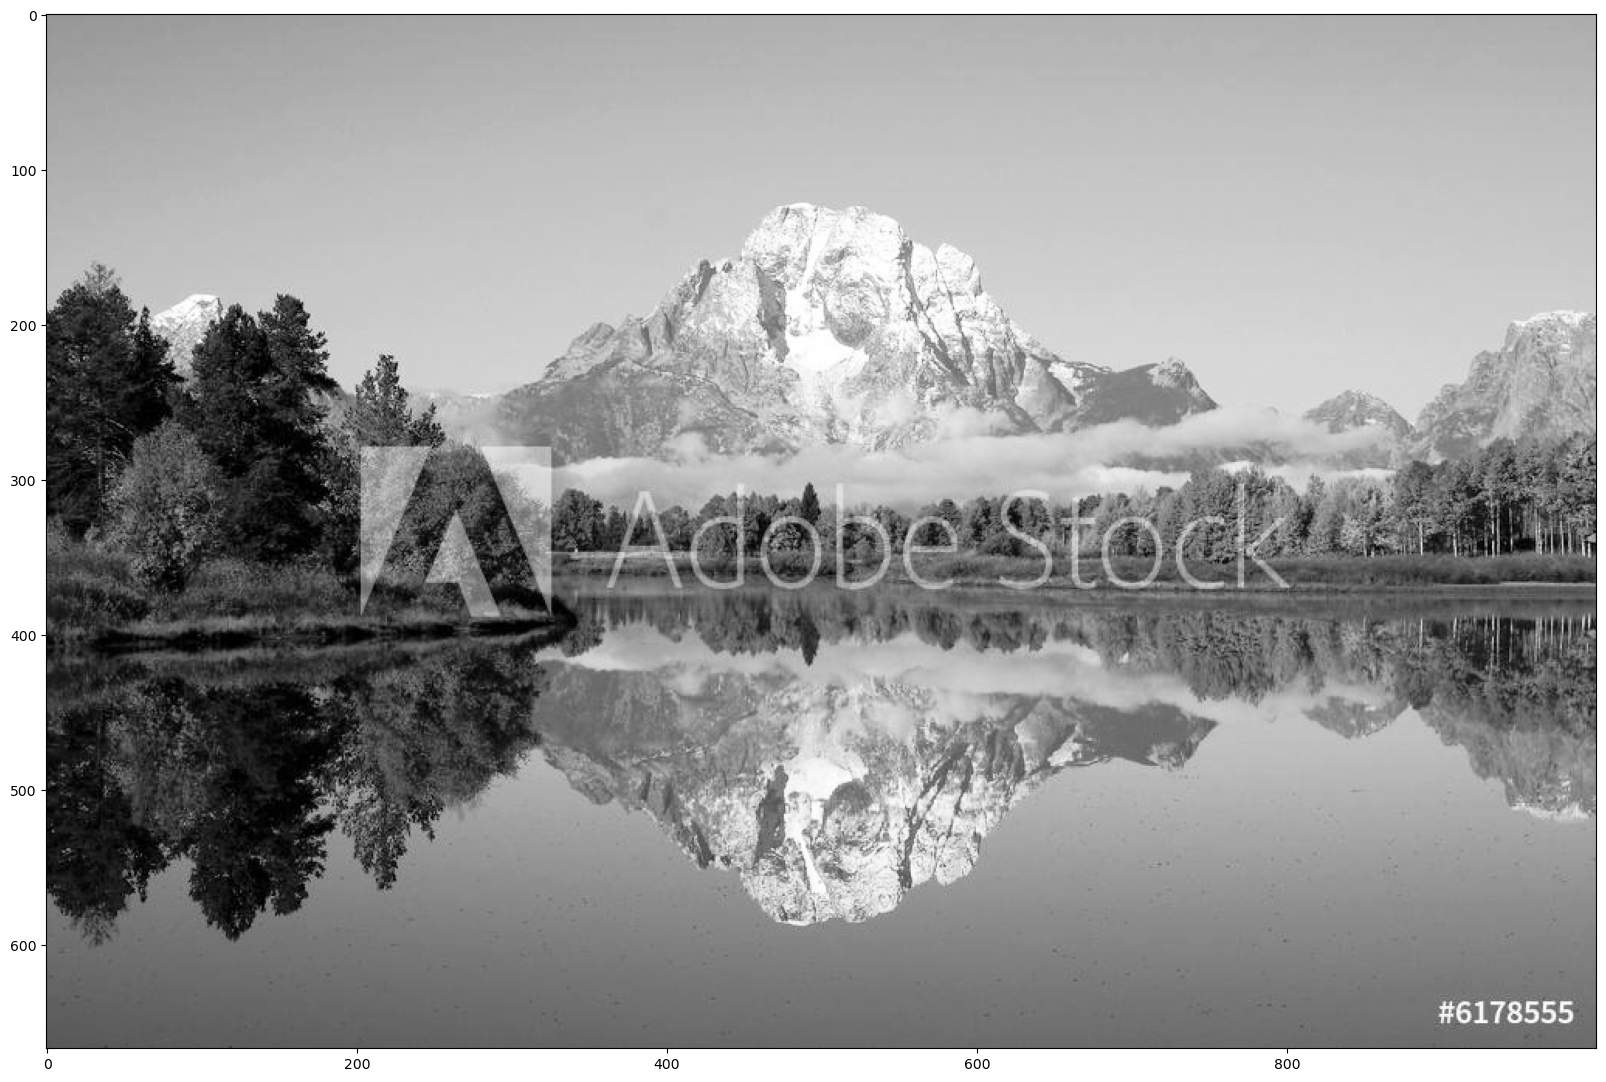

In [44]:
# https://github.com/opencv/opencv/issues/10587
# apparently matplotlib will show a color map that intensifies color by default
# add cmap="Greys_r" as an arg to the imshow method
plt.figure(figsize=(20,20))
plt.imshow(im_gray, cmap='Greys_r')
plt.show()

### color channels

Different color channels can also be worked with

In [45]:
r,g,b = rgb_img[:,:,0],rgb_img[:,:,1],rgb_img[:,:,2]

In [46]:
r

array([[71, 72, 75, ..., 87, 88, 90],
       [72, 73, 74, ..., 87, 88, 88],
       [72, 73, 72, ..., 89, 88, 87],
       ...,
       [34, 35, 34, ..., 45, 44, 42],
       [34, 34, 33, ..., 47, 47, 47],
       [33, 34, 33, ..., 49, 52, 52]], dtype=uint8)

In [48]:
# these can be concatenated back together using concat
# pass the channels as a list
img_bgr = cv2.vconcat([b,g,r])

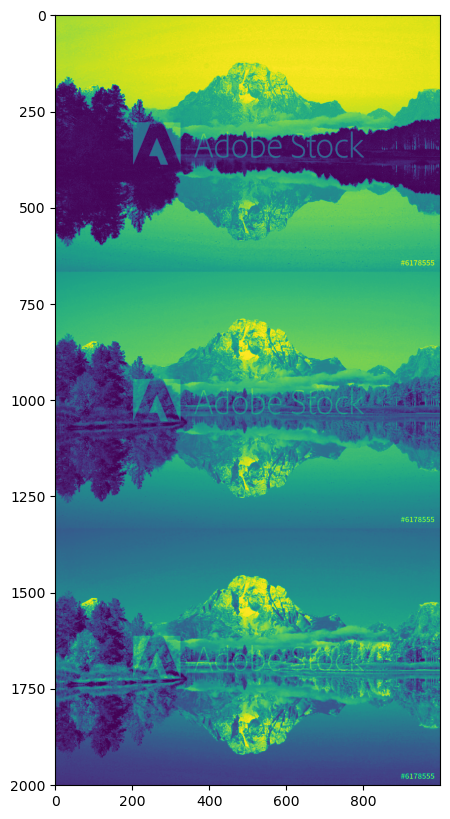

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(img_bgr)
plt.show()